# Project Group 4
## Heart Disease Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
dataset = 'heartdisease.csv'
df_heart = pd.read_csv(dataset)

### Data Set Features

The dataset is related to a study on heart disease and predicting the risk of coronary heart disease (CHD) over a ten-year period. The `TenYearCHD` column is the target variable and indicates whether the individual is at risk of developing CHD within ten years. The dataset contains information and variables that are important for assessing heart disease risk. The includes data on age, gender, education level, and if the individual is a current smoker. There are also medical measurements like blood pressure, cholesterol levels, BMI, heart rate, and glucose levels. Some variables, like `male`, `currentSmoker`, `BPMeds`, `prevalentStroke`, `prevalentHyp`, and `diabetes`, are binary variables that show whether a person falls into certain risk categories.


* **Binary Variables**: `male`, `currentSmoker`, `BPMeds`, `prevalentStroke`, `prevalentHyp`, `diabetes`
  
* **Continuous Variables**: `age`, `cigsPerDay`, `totChol`, `sysBP`, `diaBP`, `BMI`, `heartRate`, `glucose`
 
* **Categorical Variables**: `education`

In [3]:
df_heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Quality of the Data

The overall quality of the data is good, but the dataset has missing values in several columns. The values of the columns seem to fall in the correct ranges of each variable. For example, ages range from 32 to 70 years, and BMI ranges from 15.5 to 56.8.

In [4]:
# View descriptive statistics

df_heart.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## Data Wrangling
 



### Efforts to Handle Missing Data

In [5]:
# Views the missing values

df_heart.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

As seen above, there are missing values for multiple columns. In order to handle the missing data, we will use three different techniques:

- replacing by mean
- replacing by frequency
- dropping the row

### Replace by Mean

**Continuous Variables**: Missing values were replaced with the mean of the columns.

These five variables include: `cigsPerDay`, `totChol`, `BMI`, `heartRate`, and `Glucose`.

In [6]:
# Calculate the mean values for each column

avg_cigsPerDay = df_heart['cigsPerDay'].mean(axis=0)
avg_totChol = df_heart['totChol'].mean(axis=0)
avg_BMI = df_heart['BMI'].mean(axis=0)
avg_heartRate = df_heart['heartRate'].mean(axis=0)
avg_glucose = df_heart['glucose'].mean(axis=0)

# Replace missing values with the mean values for each column

df_heart['cigsPerDay'].replace(np.nan, avg_cigsPerDay, inplace=True)
df_heart['totChol'].replace(np.nan, avg_totChol, inplace=True)
df_heart['BMI'].replace(np.nan, avg_BMI, inplace=True)
df_heart['heartRate'].replace(np.nan, avg_heartRate, inplace=True)
df_heart['glucose'].replace(np.nan, avg_glucose, inplace=True)

C:\Users\prattt\AppData\Local\Temp\ipykernel_24620\1960696116.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_heart['cigsPerDay'].replace(np.nan, avg_cigsPerDay, inplace=True)
C:\Users\prattt\AppData\Local\Temp\ipykernel_24620\1960696116.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

### Replace by Frequency (Mode)

**Binary Variables**: Missing values in `BPMeds` were replaced with the mode or the value that most frequently occurs.

In [7]:
# Find out which value occurs the most

print(df_heart['BPMeds'].value_counts())

BPMeds
0.0    4061
1.0     124
Name: count, dtype: int64


Based on the analysis, the most frequently occurring value in the `BPMeds` column is 0.0, which appears 4,061 times, while the value 1.0 occurs only 124 times. Therefore, the 53 missing values in the `BPMeds` column will be replaced with 0.0.

In [8]:
df_heart['BPMeds'].replace(np.nan, 0.0, inplace=True)

C:\Users\prattt\AppData\Local\Temp\ipykernel_24620\1349228956.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_heart['BPMeds'].replace(np.nan, 0.0, inplace=True)


### Dropping the Row

**Categorical Variables**: The `education` variable is a categorical variable with education levels ranging from 1.0 - 4.0. Because the column only contains 53 missing values, for simplicity, we will drop the rows with missing values.

In [9]:
# Removes all rows with missing values

df_heart = df_heart.dropna()

In [10]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4133 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4133 non-null   int64  
 1   age              4133 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4133 non-null   int64  
 4   cigsPerDay       4133 non-null   float64
 5   BPMeds           4133 non-null   float64
 6   prevalentStroke  4133 non-null   int64  
 7   prevalentHyp     4133 non-null   int64  
 8   diabetes         4133 non-null   int64  
 9   totChol          4133 non-null   float64
 10  sysBP            4133 non-null   float64
 11  diaBP            4133 non-null   float64
 12  BMI              4133 non-null   float64
 13  heartRate        4133 non-null   float64
 14  glucose          4133 non-null   float64
 15  TenYearCHD       4133 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 548.9 KB


### Correcting the Data Format

In our initial assumptions, we stated that the variable `education` was categorical and the variable `BPMeds` was binary. To keep the data consistent, their data types were changed from`float64` to `int64`.

In [11]:
# Correcting data types

df_heart['education'] = df_heart['education'].astype('int64')
df_heart['BPMeds'] = df_heart['BPMeds'].astype('int64')

In [12]:
# View data types

df_heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4133 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4133 non-null   int64  
 1   age              4133 non-null   int64  
 2   education        4133 non-null   int64  
 3   currentSmoker    4133 non-null   int64  
 4   cigsPerDay       4133 non-null   float64
 5   BPMeds           4133 non-null   int64  
 6   prevalentStroke  4133 non-null   int64  
 7   prevalentHyp     4133 non-null   int64  
 8   diabetes         4133 non-null   int64  
 9   totChol          4133 non-null   float64
 10  sysBP            4133 non-null   float64
 11  diaBP            4133 non-null   float64
 12  BMI              4133 non-null   float64
 13  heartRate        4133 non-null   float64
 14  glucose          4133 non-null   float64
 15  TenYearCHD       4133 non-null   int64  
dtypes: float64(7), int64(9)
memory usage: 548.9 KB


### Standardizing and Splitting the Data for ML Use



We then standardized the numerical features of the heart disease dataset, then split the dataset into training and testing sets for further analysis or modeling.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# List of input variables
num_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Standardize the input list
scaler = StandardScaler()
df_heart[num_features] = scaler.fit_transform(df_heart[num_features])

# Define features (X) and target (y)
X = df_heart.drop('TenYearCHD', axis=1)
y = df_heart['TenYearCHD']

# Splits the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(3306, 15) (827, 15) (3306,) (827,)


### Scaling



MinMaxScaler is used to scale the features of both the training and testing datasets to a range between 0 and 1. This transformation ensures that all features contribute equally to the model's training process. 

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Correlation Matrix

The correlation matrix for the dataset was calculated. The resulting matrix is a table showing the correlation coefficients between all pairs of variables in the dataset. 

In [15]:
correlation_matrix = df_heart.corr()
print(correlation_matrix)

                     male       age  education  currentSmoker  cigsPerDay  \
male             1.000000 -0.029085   0.017352       0.199750    0.320996   
age             -0.029085  1.000000  -0.165883      -0.212415   -0.192059   
education        0.017352 -0.165883   1.000000       0.018532    0.008058   
currentSmoker    0.199750 -0.212415   0.018532       1.000000    0.767762   
cigsPerDay       0.320996 -0.192059   0.008058       0.767762    1.000000   
BPMeds          -0.051361  0.123828  -0.010490      -0.048429   -0.045724   
prevalentStroke -0.004304  0.058712  -0.035112      -0.033515   -0.033279   
prevalentHyp     0.003700  0.309546  -0.081970      -0.105899   -0.069318   
diabetes         0.017658  0.101186  -0.038680      -0.041171   -0.034923   
totChol         -0.073028  0.266901  -0.023008      -0.046732   -0.025791   
sysBP           -0.036736  0.394675  -0.129631      -0.130008   -0.090115   
diaBP            0.055970  0.209126  -0.062316      -0.108591   -0.056377   

### Heatmap of Correlation Matrix

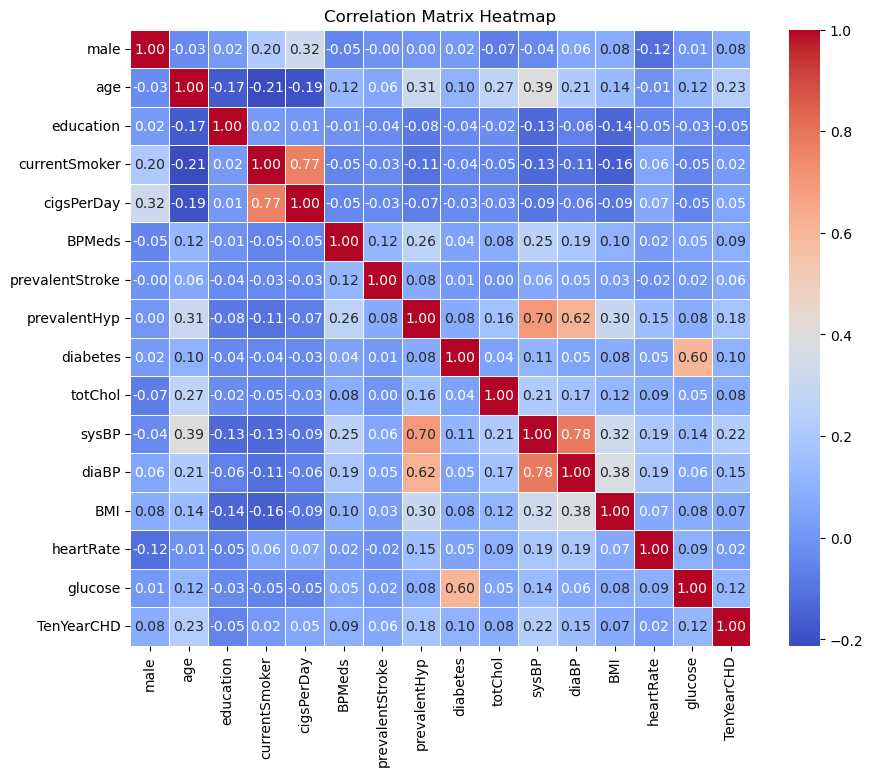

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2F",linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Data Visualization
From the correlation matrix and the heatmap, we can analyze the relationship between variables.

For example, we can see an obvious positive relationship between `sysBP` and `diaBP` vs `prevalentHyp`. 

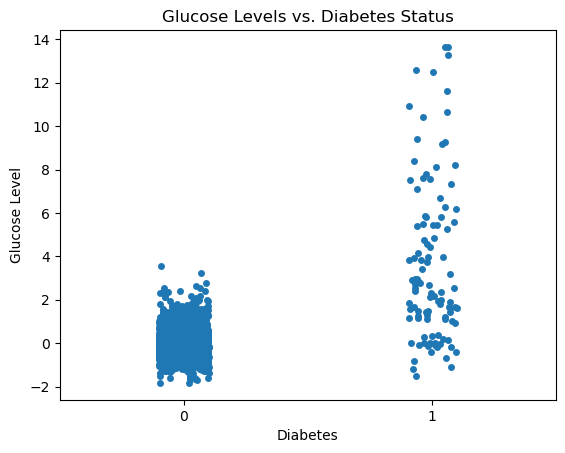

In [17]:
# Strip plot of glucose levels by diabetes status
sns.stripplot(x='diabetes', y='glucose', data=df_heart, jitter=True,)
plt.xlabel('Diabetes')
plt.ylabel('Glucose Level')
plt.title('Glucose Levels vs. Diabetes Status')
plt.show()

**Observations**:

From the strip plot above, we observed that individuals with diabetes tend to have higher glucose levels compared to those without diabetes. This aligns with medical knowledge, as diabtetes is characterized by elevated blood glucose levels. Elevated glucose levels and diabetes are well-known risk factors for heart disease. The correlation matrix and strip plot suggests a strong relationship between these two variables.

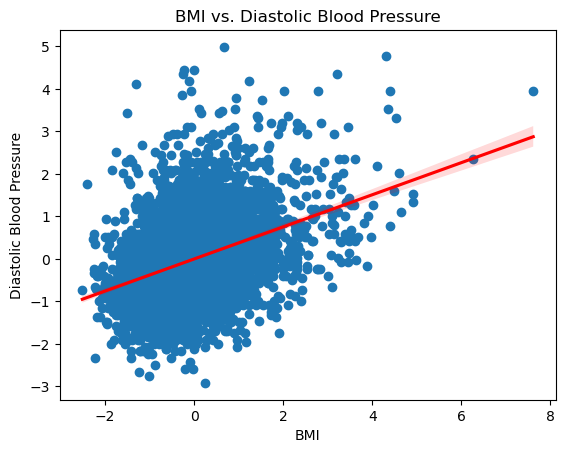

In [18]:
# Scatter plot with regression line: BMI vs. Diastolic Blood Pressure
plt.scatter(df_heart['BMI'], df_heart['diaBP'])
sns.regplot(x='BMI', y='diaBP', data=df_heart, scatter=False, color='red')
plt.xlabel('BMI')
plt.ylabel('Diastolic Blood Pressure')
plt.title('BMI vs. Diastolic Blood Pressure')
plt.show()

**Observations**:

- There appears to be a positive correlation between BMI and diastolic blood pressure. As BMI increases, diastolic blood pressure tends to increase as well.
- The scatter plot shows a wide spread of data points, indicating fluctuation in diastolic blood pressure for a given BMI. This suggests that while BMI is a factor, other variables likely influence diastolic blood pressure as well.

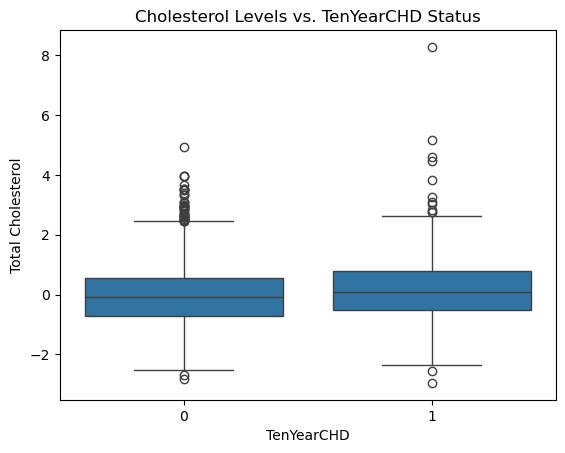

In [19]:
sns.boxplot(x='TenYearCHD', y='totChol', data=df_heart)
plt.xlabel('TenYearCHD')
plt.ylabel('Total Cholesterol')
plt.title('Cholesterol Levels vs. TenYearCHD Status')
plt.show()

The box plot above shows the distribution of total cholesterold levels for indivduals with and without TenYearCHD (10-year risk of developing heart disease).

**Observations**: 
- Individuals who developed heart disease within ten years tend to have higher cholesterol levels compared to those who did not.
- The median cholesterol level is higher for the TenYearCHD=1 group (those who developed heart disease) than for the TenYearCHD=0 group.

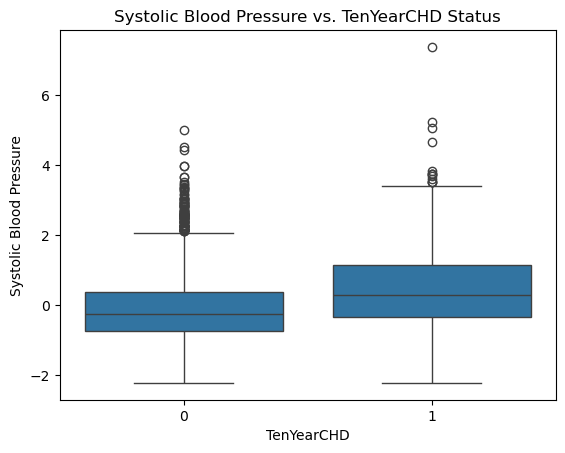

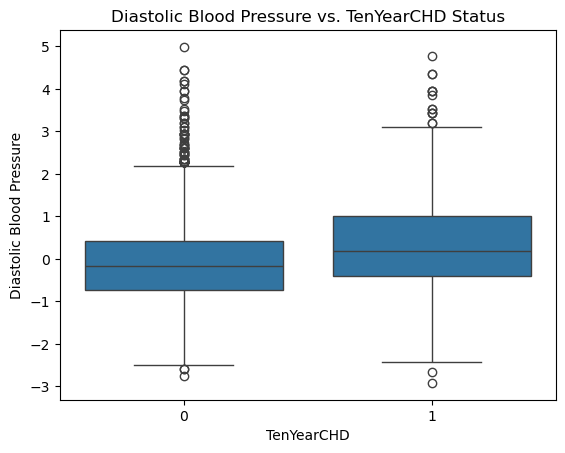

In [20]:
# Box plot of systolic blood pressure for those with and without TenYearCHD
sns.boxplot(x='TenYearCHD', y='sysBP', data=df_heart)
plt.xlabel('TenYearCHD')
plt.ylabel('Systolic Blood Pressure')
plt.title('Systolic Blood Pressure vs. TenYearCHD Status')
plt.show()

# Box plot of diastolic blood pressure for those with and without TenYearCHD
sns.boxplot(x='TenYearCHD', y='diaBP', data=df_heart)
plt.xlabel('TenYearCHD')
plt.ylabel('Diastolic Blood Pressure')
plt.title('Diastolic Blood Pressure vs. TenYearCHD Status')
plt.show()

The box plots above show the distribution of both systolic (sysBP) and diastolic (diaBP) blood pressure for individuals with and without TenYearCHD (the 10-year risk of developing heart disease).

**Observations**: 

- Individuals who developed heart disease within ten years have higher median values for both systolic and diastolic blood pressure compared to those who did not develop heart disease.
- There is greater variability and more outliers with extremely high blood pressure readings in both systolic and diastolic measurements among those who developed heart disease.
- Both systolic and diastolic blood pressure are consistently higher in the TenYearCHD=1 group, indicating that elevated blood pressure is a significant risk factor for heart disease over a 10-year period.

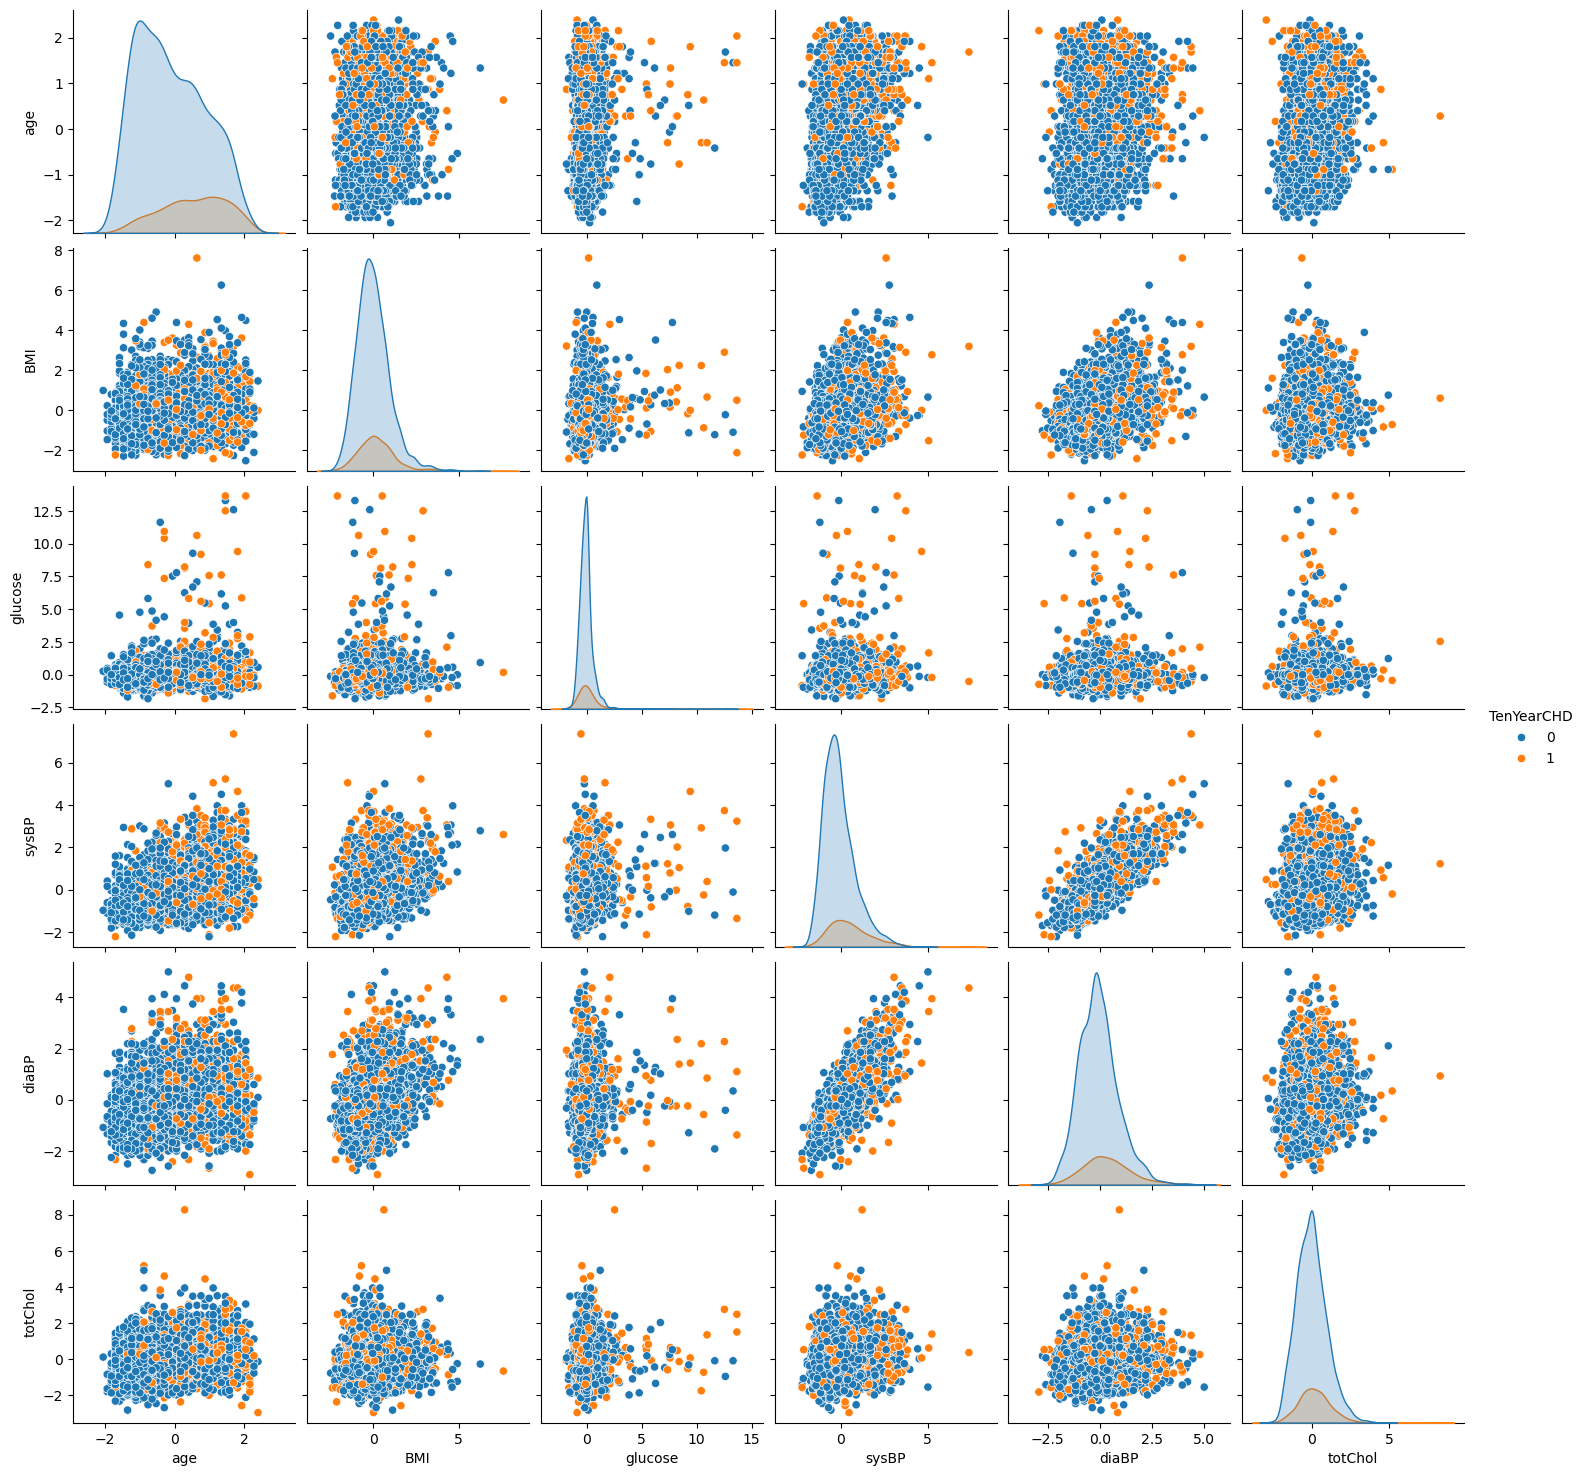

In [21]:
sns.pairplot(df_heart[['age', 'BMI', 'glucose','sysBP', 'diaBP', 'totChol', 'TenYearCHD']], hue='TenYearCHD')
plt.show()

The pair plot provides a comprehensive view of how key variables with each other and with the 10-year heart disease risk.

**Observations**:

- Age and Blood Pressure: There are visible trends where both systolic and diastolic blood pressure increase with age, especially in individuals with risk of heart disease (TenYearCHD=1).
- Cholesterol and Blood Pressure: Higher cholesterol levels tend to coincide with higher blood pressure readings, and this is more obvious in individuals with heart disease risk.
- BMI and Glucose: Elevated BMI and glucose levels are more common in individuals with the risk for heart disease, suggesting their significance as risk factors.

## Summary / Conclusion

The heart disease dataset contains a set of factors related to cardiovascular health, making it perfect for building a model to predict coronary heart disease risk. We've taken key steps to address missing values, standardize numerical features, and split the data into training and testing sets, in order to prepare the data for machine learning.

The data looks well-organized, and the included variables are relevant to predicting heart disease. Our data wrangling and analysis have ensured the dataset is clean and ready for training models. However, we still need to be mindful of potential limitations and biases.

The predictors for TenYearCHD show relatively low correlations, with the highest being age (0.228) and systolic blood pressure (0.218). This means no single predictor has a strong linear relationship with TenYearCHD, which could lead to a machine learning model that struggles to accurately predict whether a person is at risk of developing coronary heart disease within ten years, potentially requiring more complex models.

# Module 4: Assignment
## Heart Disease Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
dataset = 'cleaned_df_heart.csv'
df_heart_cleaned = pd.read_csv(dataset)

Introduction:
    The goal of this project is to predict the likelihood of a patient developing coronary heart disease (CHD) within ten years using machine learning models. The dataset contains various health indicators such as age, blood pressure, cholesterol levels, and smoking status, with `TenYearCHD` as the target variable.

# Normalize and Split the Data for ML Use

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# List of input variables
num_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Standardize the input list
scaler = StandardScaler()
df_heart_cleaned[num_features] = scaler.fit_transform(df_heart_cleaned[num_features])

# Define features (X) and target (y)
X = df_heart_cleaned.drop('TenYearCHD', axis=1)
y = df_heart_cleaned['TenYearCHD']

# Splits the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(3306, 15) (827, 15) (3306,) (827,)


# Scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Standardization



In [10]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler1 = StandardScaler()

# Fit and transform the training data
X_train_standardized = scaler1.fit_transform(X_train)

# Transform the testing data
X_test_standardized = scaler1.transform(X_test)


Packages

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score

# Create and Train Models

In [ ]:
# Initial models
log_reg = LogisticRegression(random_state=45)

tree = DecisionTreeClassifier(random_state=42)

forest = RandomForestClassifier(random_state=42)

NN = Sequential()
NN.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))  # Input layer
NN.add(Dense(16, activation='relu'))  # Hidden layer
NN.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
NN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

knn = KNeighborsClassifier(n_neighbors=15)  # You can tune the number of neighbors

# Train models
log_reg.fit(X_train_scaled, y_train)
tree.fit(X_train_scaled, y_train)
forest.fit(X_train_scaled, y_train)
NN.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)
knn.fit(X_train_scaled, y_train)

C:\Users\15042\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8466 - loss: 0.5398 - val_accuracy: 0.8686 - val_loss: 0.4042
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8494 - loss: 0.4323 - val_accuracy: 0.8686 - val_loss: 0.3911
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8521 - loss: 0.4162 - val_accuracy: 0.8686 - val_loss: 0.3842
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8465 - loss: 0.4193 - val_accuracy: 0.8686 - val_loss: 0.3775
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8550 - loss: 0.3919 - val_accuracy: 0.8686 - val_loss: 0.3745
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8459 - loss: 0.4066 - val_accuracy: 0.8686 - val_loss: 0.3667
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8537 - loss: 0.3813 - val_accuracy: 0.8686 - val_loss: 0.3632
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8439 - loss: 0.4011 - val_accuracy: 0.8701 - val_loss:

# Predictions

In [ ]:
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_tree = tree.predict(X_test_scaled)
y_pred_forest = forest.predict(X_test_scaled)
y_pred_nn = (NN.predict(X_test_scaled) > 0.5).astype("int32")
y_pred_knn = knn.predict(X_test_scaled)

# Evaluations

In [ ]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))

In [ ]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))

In [ ]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_forest))

In [ ]:
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Neural Network Classification Report:\n", classification_report(y_test, y_pred_nn))

In [ ]:
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Interpretation

Logistic Regression: Simple and interpretable, it estimates the probability of coronary heart disease risk based on individual features.

Decision Tree: Provides a clear, visual representation of decision rules for predicting risk, handling non-linear relationships.

Random Forest: Combines multiple decision trees to improve accuracy and handle complex, high-dimensional data.

Neural Networks: Models complex patterns and interactions in large datasets to predict coronary heart disease risk.

K-Nearest Neighbors (KNN): Classifies risk based on the majority class among nearest neighbors, capturing local patterns.


The logistic regression was the best model after the inital scanning of the classification reports due to the highest recall in regards to class 1 which what we care about.  All the other models scores were terrible in that regard

The model correctly identified 591 instances where the actual class was negative.
The model incorrectly identified 89 instances as positive when they were actually negative.
The model incorrectly identified 112 instances as negative when they were actually positive. 
The model correctly identified 35 instances where the actual class was positive.

The logistic regression model shows decent accuracy but struggles with precision and recall for the positive class. This suggests that the model has difficulty correctly identifying positive instances.

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
# Calculate the probabilities for each model
y_pred_prob_log_reg = log_reg.predict_proba(X_test_standardized)[:, 1]
y_pred_prob_tree = tree.predict_proba(X_test_standardized)[:, 1]
y_pred_prob_forest = forest.predict_proba(X_test_standardized)[:, 1]
y_pred_prob_knn = knn.predict_proba(X_test_standardized)[:, 1]
y_pred_prob_neural_net = NN.predict(X_test_standardized).ravel()

# Calculate AUC-ROC for each model
auc_log_reg = roc_auc_score(y_test, y_pred_prob_log_reg)
auc_tree = roc_auc_score(y_test, y_pred_prob_tree)
auc_forest = roc_auc_score(y_test, y_pred_prob_forest)
auc_knn = roc_auc_score(y_test, y_pred_prob_knn)
auc_neural_net = roc_auc_score(y_test, y_pred_prob_neural_net)

# Print AUC-ROC scores
print(f"Logistic Regression AUC-ROC: {auc_log_reg}")
print(f"Decision Tree AUC-ROC: {auc_tree}")
print(f"Random Forest AUC-ROC: {auc_forest}")
print(f"KNN AUC-ROC: {auc_knn}")
print(f"Neural Network AUC-ROC: {auc_neural_net}")

# Plot ROC curves
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_prob_log_reg)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_prob_tree)
fpr_forest, tpr_forest, _ = roc_curve(y_test, y_pred_prob_forest)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
fpr_neural_net, tpr_neural_net, _ = roc_curve(y_test, y_pred_prob_neural_net)

plt.figure(figsize=(10, 8))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {auc_log_reg:.2f})')
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {auc_tree:.2f})')
plt.plot(fpr_forest, tpr_forest, label=f'Random Forest (AUC = {auc_forest:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_neural_net, tpr_neural_net, label=f'Neural Network (AUC = {auc_neural_net:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Interpretation

    The Area Under the Receiver Operating Characteristic (AUC-ROC) curve is a performance measurement for classification problems. It tells how well a model distinguishes between classes. An AUC value of 1 indicates a perfect model, while a value of 0.5 suggests a model with no discriminative power, equivalent to random guessing.  

    Logistic regression outperforms the other models in distinguishing between classes, followed by KNN and the neural network, while the decision tree underperforms, and the random forest shows minimal discriminative ability. This evaluation shows that logistic regression is the best model.  However, since all models severly underperform in predicting class 1, having risk of coronary heart disease, it is hardly a suitable model to be used.  

    The model will attempt to be tuned to try and adjust for class imbalances.

# Tuning

In [ ]:
tuned_log_reg = LogisticRegression(class_weight='balanced', random_state=42)

tuned_log_reg.fit(X_train, y_train)

tuned_pred = tuned_log_reg.predict(X_test_scaled)

In [ ]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, tuned_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, tuned_pred))

    The class_weight='balanced' parameter helps to address class imbalance by assigning weights inversely proportional to class frequencies.
    However, the results show that while the recall for the minority class (class 1) has improved significantly to 0.90, the precision for class 1 is quite low at 0.23. This indicates that the model is over-predicting the minority class, leading to many false positives.

    The overall accuracy of the model has been reduced from 82% to 45%.
The F1-scores for both classes are relatively low (0.51 for class 0 and 0.37 for class 1), indicating a trade-off between precision and recall.

    For class 1, the high recall (0.90) suggests that the model is good at identifying actual positives, but the low precision (0.23) means many of the predicted positives are not actual positives.
    For class 0, the high precision (0.94) indicates that most of the predicted negatives are actual negatives, but the low recall (0.35) means the model misses many actual negatives.

    The model must be readjusted to try and adress these issues.

In [ ]:
tuned_log_reg2 = LogisticRegression(class_weight={0: 1, 1: 3}, random_state=42)

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}]
}

grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_


In [ ]:
print("Best Parameters:", grid_search.best_params_)

print("Best Estimator:", grid_search.best_estimator_)

print("Best Score:", grid_search.best_score_)


In [ ]:
tuned_pred2 = grid_search.best_estimator_.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, tuned_pred2))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, tuned_pred2))


# Interpretation of tuning

Class 0 (Negative Class): The original model was better at correctly classifying negative cases, achieving perfect recall but at the cost of precision for Class 1.
Class 1 (Positive Class): The new model improves recall for Class 1 but sacrifices precision, making it more balanced but still less precise.
Overall: The new model shows improved recall for the minority class (Class 1) at the expense of overall accuracy and precision. The original model had a higher overall accuracy and was better at correctly identifying negative cases, but it struggled with positive cases.

Going into this, we knew predicting coronary heart disease would be a tough task giving the other variables had low correlation to it when we first made our correlation matrix.  Although we developed models that were good at predicting class 0 or not being at risk, the models struggled heavily when trying to predict class 1.  Through tuning the model showed an improvement of recall for class 1, but sacrificed overall accuracy and precision.

# Summary

When interpreting the results of our logistic regression models, the context of the problem is crucial. Our primary goal is to predict whether an individual is at risk of developing coronary heart disease in ten years. While overall accuracy is an important metric, the accuracy of each class is not equally significant. From a medical standpoint, it is more beneficial to predict someone as at risk and have them not develop the disease, rather than failing to identify someone who is at risk.

Our aim is to focus on increasing the true positive rate and reducing false negatives. For this reason, we compared two models: the original logistic regression model and a tuned version.

In the initial model, we observed an accuracy of 82.5% with a classification report indicating a high recall for class 0 (true negatives) but very low recall for class 1 (true positives). This suggested that while the model was good at identifying individuals who were not at risk, it was poor at detecting those who were at risk, with a significant number of false negatives.

After tuning the logistic regression model by adjusting class weights, we achieved an accuracy of 74% with improved performance in terms of recall for class 1. The true positive rate increased, reducing the number of false negatives. Although the overall accuracy dropped slightly, the adjusted model better aligns with our goal of identifying at-risk individuals. This model’s improved balance between precision and recall for class 1 indicates a more effective approach for flagging individuals who might be at risk, thereby allowing for timely intervention.

In summary, the tuned model provides a better trade-off between identifying at-risk individuals and minimizing false negatives, which is crucial for our goal of proactive risk management.